In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import pandas as pd
import plotly.graph_objects as go
import datetime
pd.options.mode.chained_assignment = None  # default='warn'
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.linear_model import LinearRegression
from ast import literal_eval
from sklearn.feature_extraction.text import CountVectorizer
df1 = pd.read_csv('C:\\Users\\Geksmode\\Desktop\\data\\World_Population.csv')
df2 = pd.read_csv('C:\\Users\\Geksmode\\Desktop\\data\\world_population_scale.csv')
df_population_world = pd.read_csv('C:\\Users\\Geksmode\\Desktop\\data\\API_SP.POP.GROW_DS2_en_csv_v2_2164049.csv')

In [2]:
plt.style.use("seaborn-whitegrid")
plt.rc("figure", autolayout=True, figsize=(11, 5))
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=14,
    titlepad=10,
)
plot_params = dict(
    color="0.75",
    style=".-",
    markeredgecolor="0.25",
    markerfacecolor="0.25",
    legend=False,
)
%config InlineBackend.figure_format = 'retina'

C:\Users\Geksmode\AppData\Local\Temp\ipykernel_18060\1343610355.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-whitegrid")


In [3]:
df_population_world = df_population_world.drop(df_population_world[df_population_world["1961"].isnull() == True].index,axis=0)
df_population_world[df_population_world.columns[5:-1]].isnull().sum()
df_population_world = df_population_world.fillna(0)

In [4]:
df1

# Country (or dependency)  Population (2023) Yearly Change  Net Change  \
0      1                   India         1428627663        0.81 %    11454490   
1      2                   China         1425671352       -0.02 %     -215985   
2      3           United States          339996563         0.5 %     1706706   
3      4               Indonesia          277534122        0.74 %     2032783   
4      5                Pakistan          240485658        1.98 %     4660796   
..   ...                     ...                ...           ...         ...   
229  230              Montserrat               4386       -0.09 %          -4   
230  231        Falkland Islands               3791        0.29 %          11   
231  232                    Niue               1935        0.05 %           1   
232  233                 Tokelau               1893        1.18 %          22   
233  234                Holy See                518        1.57 %           8   

     Density  (P/Km²)  Land Area  (Km²)  Migrants (net) Fert. Rate  Med. Age  \
0                 481           2973190         -486136      1.999      28.0   
1                 152           9388211         -310220       1.19      39.0   
2                  37           9147420          999700      1.662      38.0   
3                 153           1811570          -49997      2.134      30.0   
4                 312            770880         -165988      3.347      21.0   
..                ...               ...             ...        ...       ...   
229                44               100               0      1.556      44.0   
230                 0             12170               0      1.585      40.0   
231                 7               260               0       2.39      36.0   
232               189                10               0      2.635      27.0   
233              1295                 0               0        ...       NaN   

    Urban Pop % World Share  
0        36.3 %      17.8 %  
1          65 %      17.7 %  
2        82.9 %       4.2 %  
3        59.1 %       3.4 %  
4        34.7 %         3 %  
..          ...         ...  
229      11.2 %         0 %  
230      61.6 %         0 %  
231      40.8 %         0 %  
232         0 %         0 %  
233        N.A.         0 %  

[234 rows x 12 columns]

In [5]:
df2

Rank CCA3  Country/Territory           Capital Continent  \
0      36  AFG        Afghanistan             Kabul      Asia   
1     138  ALB            Albania            Tirana    Europe   
2      34  DZA            Algeria           Algiers    Africa   
3     213  ASM     American Samoa         Pago Pago   Oceania   
4     203  AND            Andorra  Andorra la Vella    Europe   
..    ...  ...                ...               ...       ...   
229   226  WLF  Wallis and Futuna          Mata-Utu   Oceania   
230   172  ESH     Western Sahara          El Aaiún    Africa   
231    46  YEM              Yemen             Sanaa      Asia   
232    63  ZMB             Zambia            Lusaka    Africa   
233    74  ZWE           Zimbabwe            Harare    Africa   

     2022 Population  2020 Population  2015 Population  2010 Population  \
0           41128771         38972230         33753499         28189672   
1            2842321          2866849          2882481          2913399   
2           44903225         43451666         39543154         35856344   
3              44273            46189            51368            54849   
4              79824            77700            71746            71519   
..               ...              ...              ...              ...   
229            11572            11655            12182            13142   
230           575986           556048           491824           413296   
231         33696614         32284046         28516545         24743946   
232         20017675         18927715         16248230         13792086   
233         16320537         15669666         14154937         12839771   

     2000 Population  1990 Population  1980 Population  1970 Population  \
0           19542982         10694796         12486631         10752971   
1            3182021          3295066          2941651          2324731   
2           30774621         25518074         18739378         13795915   
3              58230            47818            32886            27075   
4              66097            53569            35611            19860   
..               ...              ...              ...              ...   
229            14723            13454            11315             9377   
230           270375           178529           116775            76371   
231         18628700         13375121          9204938          6843607   
232          9891136          7686401          5720438          4281671   
233         11834676         10113893          7049926          5202918   

     Area (km²)  Density (per km²)  Growth Rate  World Population Percentage  
0        652230            63.0587       1.0257                         0.52  
1         28748            98.8702       0.9957                         0.04  
2       2381741            18.8531       1.0164                         0.56  
3           199           222.4774       0.9831                         0.00  
4           468           170.5641       1.0100                         0.00  
..          ...                ...          ...                          ...  
229         142            81.4930       0.9953                         0.00  
230      266000             2.1654       1.0184                         0.01  
231      527968            63.8232       1.0217                         0.42  
232      752612            26.5976       1.0280                         0.25  
233      390757            41.7665       1.0204                         0.20  

[234 rows x 17 columns]

In [6]:
#Rename Columns
df1 = df1.rename(columns = {"Net Change":"NetChange","Yearly Change":"YearlyChange","World Share":"WorldShare","Urban Pop %":"UrbanPop%","Country (or dependency)":"Country","Population (2023)":"2023 Population","Density  (P/Km²)":"Density(P/Km²)","Land Area  (Km²)":"LandArea(Km²)","Migrants (net)":"Migrants(net)","Fert. Rate":"FertRate","Med. Age":"Med.Age"})
df2 = df2.rename(columns = {"Country/Territory":"Country"})

In [7]:
df_merge = df1[["Country"]].merge(df2, on="Country",how = "left")
df_merge = df_merge.drop("Country",axis=1)
df_world = df1.join(df_merge)
df_world

#           Country  2023 Population YearlyChange  NetChange  \
0      1             India       1428627663       0.81 %   11454490   
1      2             China       1425671352      -0.02 %    -215985   
2      3     United States        339996563        0.5 %    1706706   
3      4         Indonesia        277534122       0.74 %    2032783   
4      5          Pakistan        240485658       1.98 %    4660796   
..   ...               ...              ...          ...        ...   
229  230        Montserrat             4386      -0.09 %         -4   
230  231  Falkland Islands             3791       0.29 %         11   
231  232              Niue             1935       0.05 %          1   
232  233           Tokelau             1893       1.18 %         22   
233  234          Holy See              518       1.57 %          8   

     Density(P/Km²)  LandArea(Km²)  Migrants(net) FertRate  Med.Age  ...  \
0               481        2973190        -486136    1.999     28.0  ...   
1               152        9388211        -310220     1.19     39.0  ...   
2                37        9147420         999700    1.662     38.0  ...   
3               153        1811570         -49997    2.134     30.0  ...   
4               312         770880        -165988    3.347     21.0  ...   
..              ...            ...            ...      ...      ...  ...   
229              44            100              0    1.556     44.0  ...   
230               0          12170              0    1.585     40.0  ...   
231               7            260              0     2.39     36.0  ...   
232             189             10              0    2.635     27.0  ...   
233            1295              0              0      ...      NaN  ...   

    2015 Population 2010 Population  2000 Population 1990 Population  \
0      1.322867e+09    1.240614e+09     1.059634e+09    8.704522e+08   
1      1.393715e+09    1.348191e+09     1.264099e+09    1.153704e+09   
2      3.246078e+08    3.111828e+08     2.823986e+08    2.480837e+08   
3      2.590920e+08    2.440162e+08     2.140724e+08    1.821599e+08   
4      2.109693e+08    1.944545e+08     1.543699e+08    1.154141e+08   
..              ...             ...              ...             ...   
229    5.059000e+03    4.938000e+03     5.138000e+03    1.080500e+04   
230    3.408000e+03    3.187000e+03     3.080000e+03    2.332000e+03   
231    1.847000e+03    1.812000e+03     2.074000e+03    2.533000e+03   
232    1.454000e+03    1.367000e+03     1.666000e+03    1.669000e+03   
233             NaN             NaN              NaN             NaN   

    1980 Population 1970 Population  Area (km²)  Density (per km²)  \
0       696828385.0     557501301.0   3287590.0           431.0675   
1       982372466.0     822534450.0   9706961.0           146.8933   
2       223140018.0     200328340.0   9372610.0            36.0935   
3       148177096.0     115228394.0   1904569.0           144.6529   
4        80624057.0      59290872.0    881912.0           267.4018   
..              ...             ...         ...                ...   
229         11452.0         11402.0       102.0            43.0392   
230          2240.0          2274.0     12173.0             0.3105   
231          3637.0          5185.0       260.0             7.4385   
232          1647.0          1714.0        12.0           155.9167   
233             NaN             NaN         NaN                NaN   

     Growth Rate  World Population Percentage  
0         1.0068                        17.77  
1         1.0000                        17.88  
2         1.0038                         4.24  
3         1.0064                         3.45  
4         1.0191                         2.96  
..           ...                          ...  
229       0.9939                         0.00  
230       1.0043                         0.00  
231       0.9985                         0.00  
232       1.0119                         0.00  
233    

In [8]:
df_world.isnull().sum()

#                               0
Country                         0
2023 Population                 0
YearlyChange                    0
NetChange                       0
Density(P/Km²)                  0
LandArea(Km²)                   0
Migrants(net)                   0
FertRate                        0
Med.Age                         1
UrbanPop%                       0
WorldShare                      0
Rank                           19
CCA3                           19
Capital                        19
Continent                      19
2022 Population                19
2020 Population                19
2015 Population                19
2010 Population                19
2000 Population                19
1990 Population                19
1980 Population                19
1970 Population                19
Area (km²)                     19
Density (per km²)              19
Growth Rate                    19
World Population Percentage    19
dtype: int64

In [9]:
df_world = df_world.dropna()

df_world

#           Country  2023 Population YearlyChange  NetChange  \
0      1             India       1428627663       0.81 %   11454490   
1      2             China       1425671352      -0.02 %    -215985   
2      3     United States        339996563        0.5 %    1706706   
3      4         Indonesia        277534122       0.74 %    2032783   
4      5          Pakistan        240485658       1.98 %    4660796   
..   ...               ...              ...          ...        ...   
226  227  Saint Barthelemy            10994       0.25 %         27   
229  230        Montserrat             4386      -0.09 %         -4   
230  231  Falkland Islands             3791       0.29 %         11   
231  232              Niue             1935       0.05 %          1   
232  233           Tokelau             1893       1.18 %         22   

     Density(P/Km²)  LandArea(Km²)  Migrants(net) FertRate  Med.Age  ...  \
0               481        2973190        -486136    1.999     28.0  ...   
1               152        9388211        -310220     1.19     39.0  ...   
2                37        9147420         999700    1.662     38.0  ...   
3               153        1811570         -49997    2.134     30.0  ...   
4               312         770880        -165988    3.347     21.0  ...   
..              ...            ...            ...      ...      ...  ...   
226             524             21              0    1.031     40.0  ...   
229              44            100              0    1.556     44.0  ...   
230               0          12170              0    1.585     40.0  ...   
231               7            260              0     2.39     36.0  ...   
232             189             10              0    2.635     27.0  ...   

    2015 Population 2010 Population  2000 Population 1990 Population  \
0      1.322867e+09    1.240614e+09     1.059634e+09    8.704522e+08   
1      1.393715e+09    1.348191e+09     1.264099e+09    1.153704e+09   
2      3.246078e+08    3.111828e+08     2.823986e+08    2.480837e+08   
3      2.590920e+08    2.440162e+08     2.140724e+08    1.821599e+08   
4      2.109693e+08    1.944545e+08     1.543699e+08    1.154141e+08   
..              ...             ...              ...             ...   
226    9.643000e+03    8.988000e+03     7.082000e+03    5.168000e+03   
229    5.059000e+03    4.938000e+03     5.138000e+03    1.080500e+04   
230    3.408000e+03    3.187000e+03     3.080000e+03    2.332000e+03   
231    1.847000e+03    1.812000e+03     2.074000e+03    2.533000e+03   
232    1.454000e+03    1.367000e+03     1.666000e+03    1.669000e+03   

    1980 Population 1970 Population  Area (km²)  Density (per km²)  \
0       696828385.0     557501301.0   3287590.0           431.0675   
1       982372466.0     822534450.0   9706961.0           146.8933   
2       223140018.0     200328340.0   9372610.0            36.0935   
3       148177096.0     115228394.0   1904569.0           144.6529   
4        80624057.0      59290872.0    881912.0           267.4018   
..              ...             ...         ...                ...   
226          2983.0          2417.0        21.0           522.2381   
229         11452.0         11402.0       102.0            43.0392   
230          2240.0          2274.0     12173.0             0.3105   
231          3637.0          5185.0       260.0             7.4385   
232          1647.0          1714.0        12.0           155.9167   

     Growth Rate  World Population Percentage  
0         1.0068                        17.77  
1         1.0000                        17.88  
2         1.0038                         4.24  
3         1.0064                         3.45  
4         1.0191                         2.96  
..           ...                          ...  
226       1.0098                         0.00  
229       0.9939                         0.00  
230       1.0043                         0.00  
231       0.9985                         0.00  
232    

In [10]:
#take the 191 first rows , the number of country in the world
df_world = df_world.loc[df_world['#']<192]

In [11]:
df_world.info()

<class 'pandas.core.frame.DataFrame'>
Index: 182 entries, 0 to 190
Data columns (total 28 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   #                            182 non-null    int64  
 1   Country                      182 non-null    object 
 2   2023 Population              182 non-null    int64  
 3   YearlyChange                 182 non-null    object 
 4   NetChange                    182 non-null    int64  
 5   Density(P/Km²)               182 non-null    int64  
 6   LandArea(Km²)                182 non-null    int64  
 7   Migrants(net)                182 non-null    int64  
 8   FertRate                     182 non-null    object 
 9   Med.Age                      182 non-null    float64
 10  UrbanPop%                    182 non-null    object 
 11  WorldShare                   182 non-null    object 
 12  Rank                         182 non-null    float64
 13  CCA3                     

In [12]:
#Clean my data

def no_pourcentage(x):
    a = x.find("%")
    return x[0:a-1]

def no_Na(x):
    return x.replace('N.',"0")

pourcentages = ["YearlyChange","UrbanPop%","WorldShare"]

for pourcentage in pourcentages :
    df_world[pourcentage]= df_world[pourcentage].apply(no_pourcentage)
    
df_world["UrbanPop%"] = df_world["UrbanPop%"].apply(no_Na)
    

In [13]:
df_world

#           Country  2023 Population YearlyChange  NetChange  \
0      1             India       1428627663         0.81   11454490   
1      2             China       1425671352        -0.02    -215985   
2      3     United States        339996563          0.5    1706706   
3      4         Indonesia        277534122         0.74    2032783   
4      5          Pakistan        240485658         1.98    4660796   
..   ...               ...              ...          ...        ...   
184  185  French Polynesia           308872         0.85       2593   
185  186     New Caledonia           292991         1.05       3041   
186  187          Barbados           281995         0.13        360   
188  189             Samoa           225681         1.48       3299   
190  191       Saint Lucia           180251         0.22        394   

     Density(P/Km²)  LandArea(Km²)  Migrants(net) FertRate  Med.Age  ...  \
0               481        2973190        -486136    1.999     28.0  ...   
1               152        9388211        -310220     1.19     39.0  ...   
2                37        9147420         999700    1.662     38.0  ...   
3               153        1811570         -49997    2.134     30.0  ...   
4               312         770880        -165988    3.347     21.0  ...   
..              ...            ...            ...      ...      ...  ...   
184              84           3660           -100    1.681     34.0  ...   
185              16          18280            500    1.986     34.0  ...   
186             656            430            -80    1.627     40.0  ...   
188              80           2830          -1500    3.827     21.0  ...   
190             295            610              0    1.379     34.0  ...   

    2015 Population 2010 Population  2000 Population 1990 Population  \
0      1.322867e+09    1.240614e+09     1.059634e+09    8.704522e+08   
1      1.393715e+09    1.348191e+09     1.264099e+09    1.153704e+09   
2      3.246078e+08    3.111828e+08     2.823986e+08    2.480837e+08   
3      2.590920e+08    2.440162e+08     2.140724e+08    1.821599e+08   
4      2.109693e+08    1.944545e+08     1.543699e+08    1.154141e+08   
..              ...             ...              ...             ...   
184    2.917870e+05    2.837880e+05     2.509270e+05    2.110890e+05   
185    2.830320e+05    2.614260e+05     2.215370e+05    1.772640e+05   
186    2.780830e+05    2.747110e+05     2.646570e+05    2.588680e+05   
188    2.035710e+05    1.946720e+05     1.840080e+05    1.681860e+05   
190    1.756230e+05    1.709350e+05     1.595000e+05    1.423010e+05   

    1980 Population 1970 Population  Area (km²)  Density (per km²)  \
0       696828385.0     557501301.0   3287590.0           431.0675   
1       982372466.0     822534450.0   9706961.0           146.8933   
2       223140018.0     200328340.0   9372610.0            36.0935   
3       148177096.0     115228394.0   1904569.0           144.6529   
4        80624057.0      59290872.0    881912.0           267.4018   
..              ...             ...         ...                ...   
184        163591.0        117891.0      4167.0            73.5011   
185        148599.0        110982.0     18575.0            15.6097   
186        253575.0        241397.0       430.0           654.9651   
188        164905.0        142771.0      2842.0            78.2484   
190        121633.0        103090.0       616.0           291.9756   

     Growth Rate  World Population Percentage  
0         1.0068                        17.77  
1         1.0000                        17.88  
2         1.0038                         4.24  
3         1.0064                         3.45  
4         1.0191                         2.96  
..           ...                          ...  
184       1.0074                         0.00  
185       1.0075                         0.00  
186       1.0015                         0.00  
188       1.0165                         0.00  
190    

In [14]:
df_world

#           Country  2023 Population YearlyChange  NetChange  \
0      1             India       1428627663         0.81   11454490   
1      2             China       1425671352        -0.02    -215985   
2      3     United States        339996563          0.5    1706706   
3      4         Indonesia        277534122         0.74    2032783   
4      5          Pakistan        240485658         1.98    4660796   
..   ...               ...              ...          ...        ...   
184  185  French Polynesia           308872         0.85       2593   
185  186     New Caledonia           292991         1.05       3041   
186  187          Barbados           281995         0.13        360   
188  189             Samoa           225681         1.48       3299   
190  191       Saint Lucia           180251         0.22        394   

     Density(P/Km²)  LandArea(Km²)  Migrants(net) FertRate  Med.Age  ...  \
0               481        2973190        -486136    1.999     28.0  ...   
1               152        9388211        -310220     1.19     39.0  ...   
2                37        9147420         999700    1.662     38.0  ...   
3               153        1811570         -49997    2.134     30.0  ...   
4               312         770880        -165988    3.347     21.0  ...   
..              ...            ...            ...      ...      ...  ...   
184              84           3660           -100    1.681     34.0  ...   
185              16          18280            500    1.986     34.0  ...   
186             656            430            -80    1.627     40.0  ...   
188              80           2830          -1500    3.827     21.0  ...   
190             295            610              0    1.379     34.0  ...   

    2015 Population 2010 Population  2000 Population 1990 Population  \
0      1.322867e+09    1.240614e+09     1.059634e+09    8.704522e+08   
1      1.393715e+09    1.348191e+09     1.264099e+09    1.153704e+09   
2      3.246078e+08    3.111828e+08     2.823986e+08    2.480837e+08   
3      2.590920e+08    2.440162e+08     2.140724e+08    1.821599e+08   
4      2.109693e+08    1.944545e+08     1.543699e+08    1.154141e+08   
..              ...             ...              ...             ...   
184    2.917870e+05    2.837880e+05     2.509270e+05    2.110890e+05   
185    2.830320e+05    2.614260e+05     2.215370e+05    1.772640e+05   
186    2.780830e+05    2.747110e+05     2.646570e+05    2.588680e+05   
188    2.035710e+05    1.946720e+05     1.840080e+05    1.681860e+05   
190    1.756230e+05    1.709350e+05     1.595000e+05    1.423010e+05   

    1980 Population 1970 Population  Area (km²)  Density (per km²)  \
0       696828385.0     557501301.0   3287590.0           431.0675   
1       982372466.0     822534450.0   9706961.0           146.8933   
2       223140018.0     200328340.0   9372610.0            36.0935   
3       148177096.0     115228394.0   1904569.0           144.6529   
4        80624057.0      59290872.0    881912.0           267.4018   
..              ...             ...         ...                ...   
184        163591.0        117891.0      4167.0            73.5011   
185        148599.0        110982.0     18575.0            15.6097   
186        253575.0        241397.0       430.0           654.9651   
188        164905.0        142771.0      2842.0            78.2484   
190        121633.0        103090.0       616.0           291.9756   

     Growth Rate  World Population Percentage  
0         1.0068                        17.77  
1         1.0000                        17.88  
2         1.0038                         4.24  
3         1.0064                         3.45  
4         1.0191                         2.96  
..           ...                          ...  
184       1.0074                         0.00  
185       1.0075                         0.00  
186       1.0015                         0.00  
188       1.0165                         0.00  
190    

In [15]:
#Change the Data Type
pourcentages = ["YearlyChange","UrbanPop%","WorldShare","FertRate"]
for pourcentage in pourcentages :
    df_world[pourcentage] = df_world[pourcentage].astype("float64")

In [16]:
df_world.info()

<class 'pandas.core.frame.DataFrame'>
Index: 182 entries, 0 to 190
Data columns (total 28 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   #                            182 non-null    int64  
 1   Country                      182 non-null    object 
 2   2023 Population              182 non-null    int64  
 3   YearlyChange                 182 non-null    float64
 4   NetChange                    182 non-null    int64  
 5   Density(P/Km²)               182 non-null    int64  
 6   LandArea(Km²)                182 non-null    int64  
 7   Migrants(net)                182 non-null    int64  
 8   FertRate                     182 non-null    float64
 9   Med.Age                      182 non-null    float64
 10  UrbanPop%                    182 non-null    float64
 11  WorldShare                   182 non-null    float64
 12  Rank                         182 non-null    float64
 13  CCA3                     

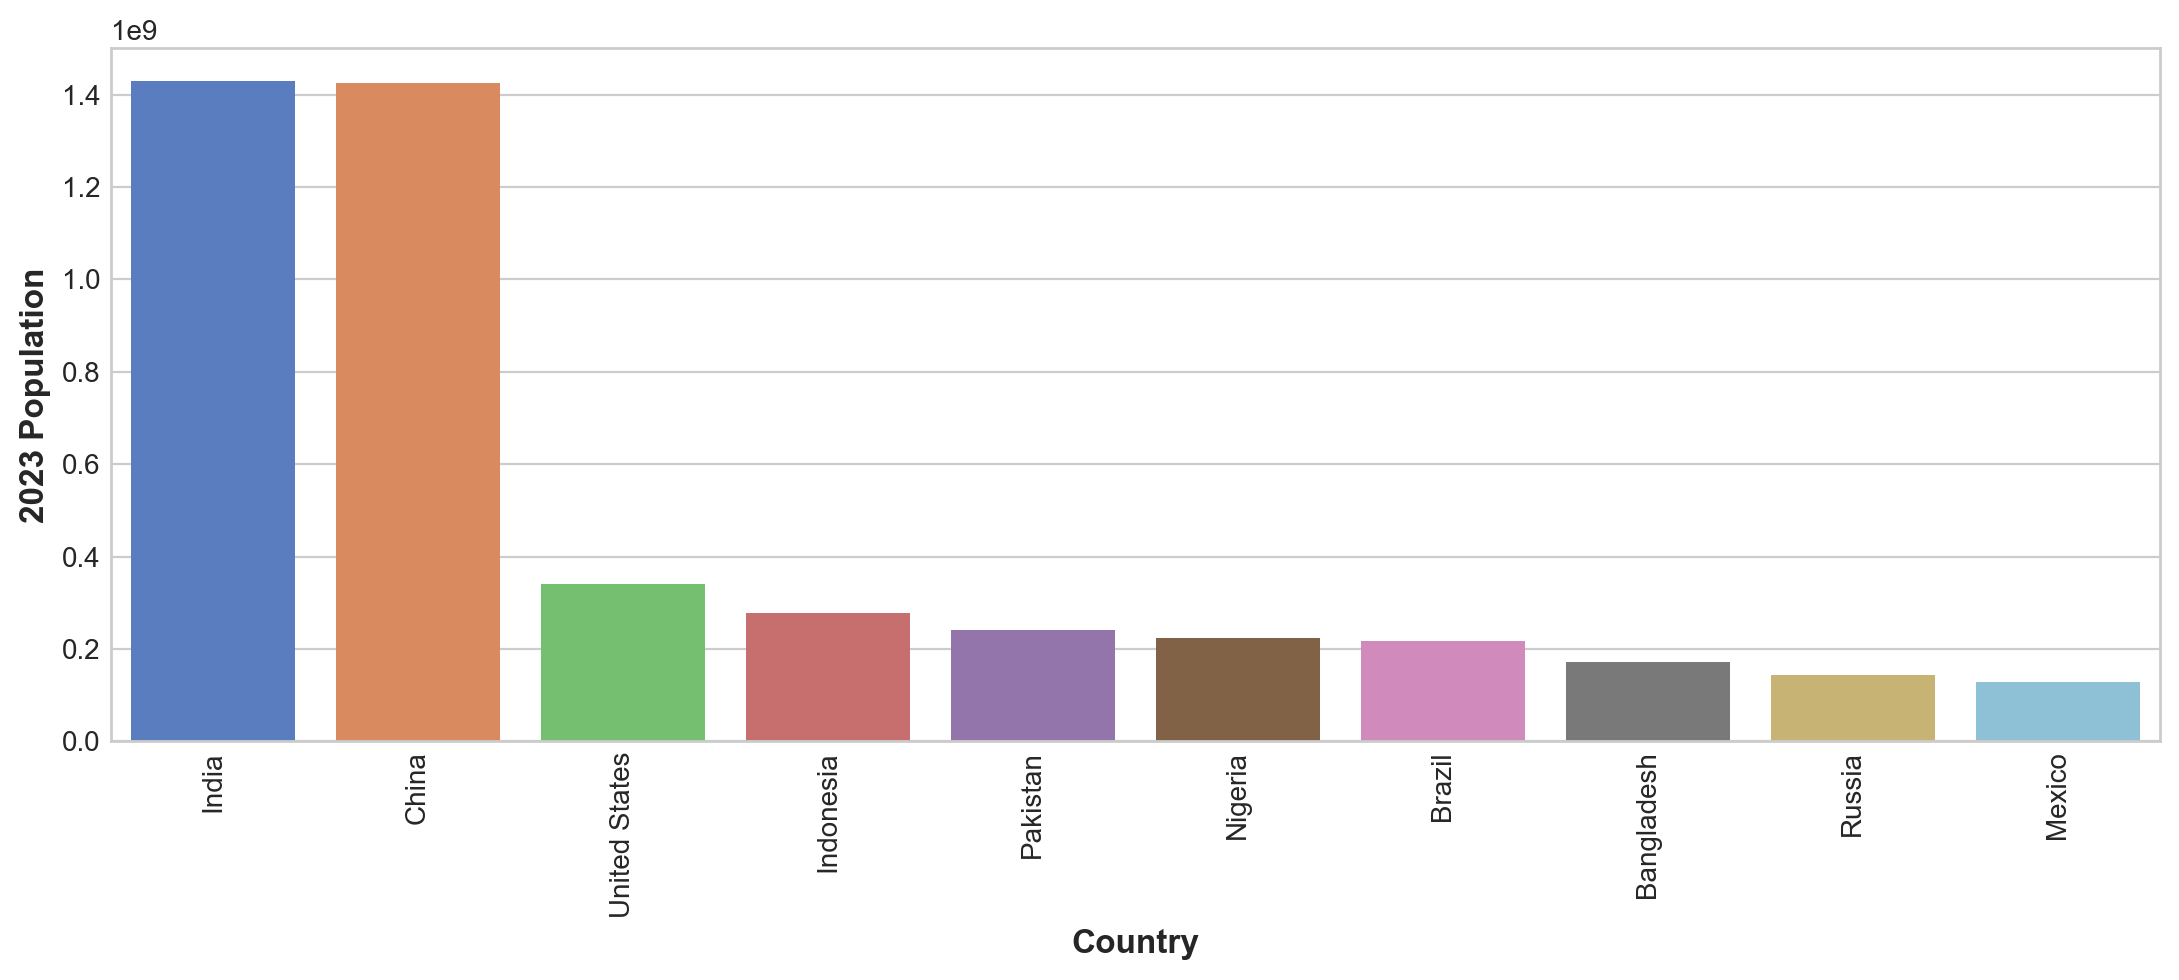

In [17]:
df_world_population = df_world.sort_values(by=['2023 Population'], ascending = False).head(10)

p = sns.barplot(x="Country", data = df_world_population, y= "2023 Population",  palette="muted")
_ = plt.setp(p.get_xticklabels(), rotation=90) 

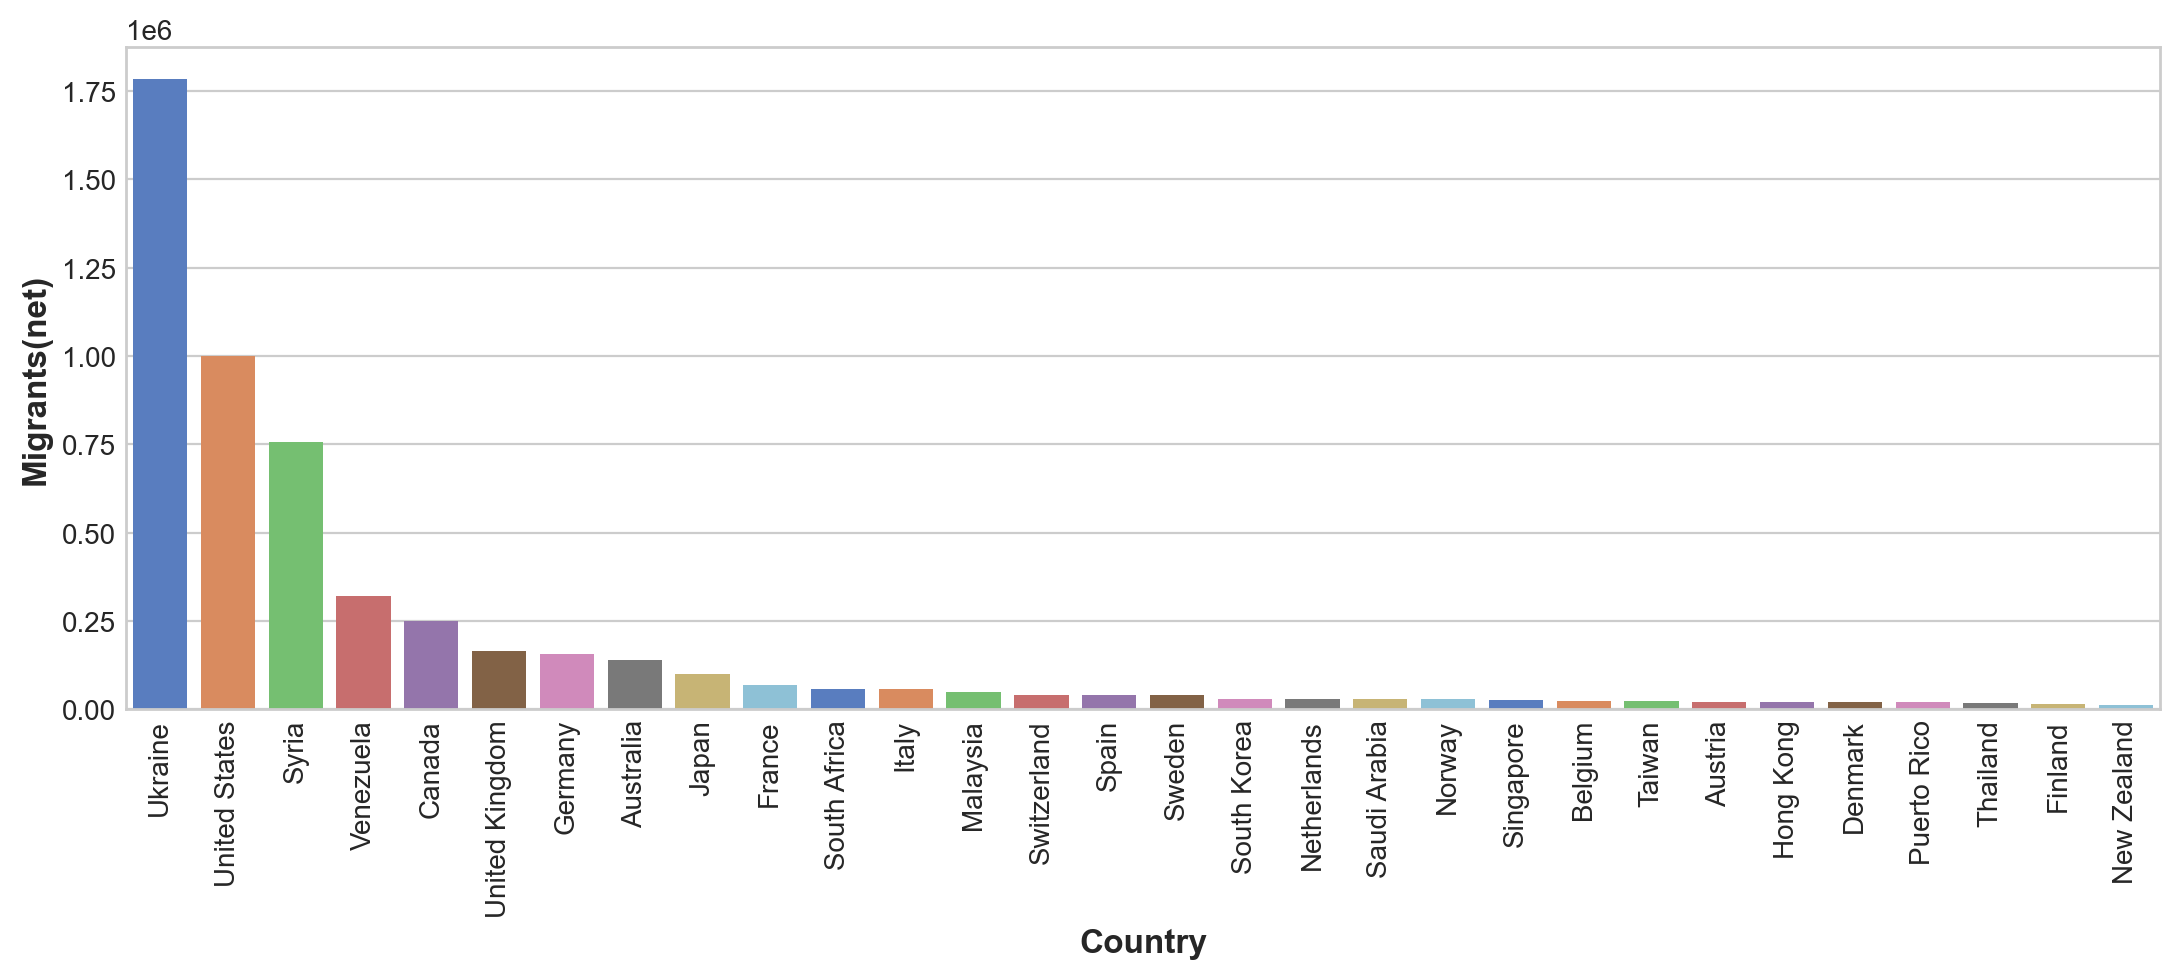

In [18]:
df_world_migrants_descending = df_world.sort_values(by=['Migrants(net)'], ascending = False).head(30)

p = sns.barplot(x="Country", data = df_world_migrants_descending, y= "Migrants(net)",  palette="muted")
_ = plt.setp(p.get_xticklabels(), rotation=90) 

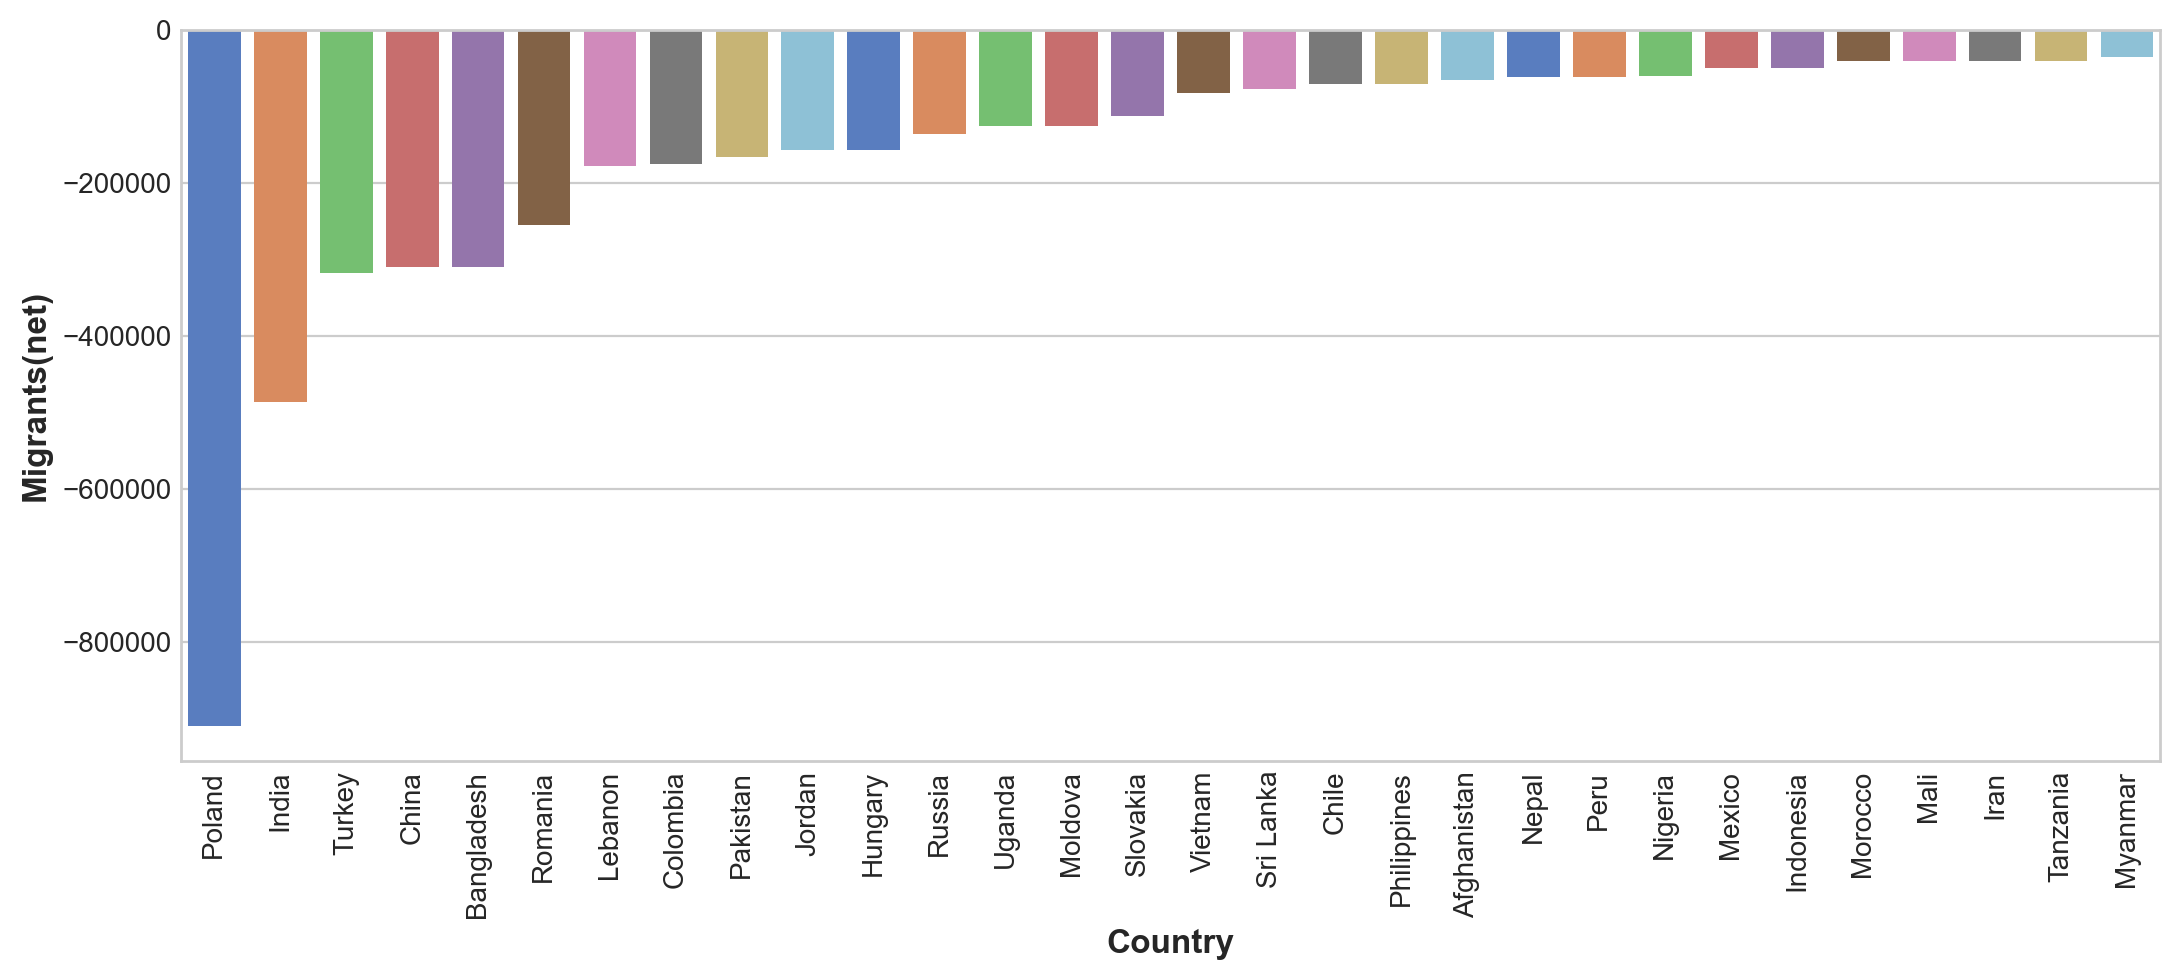

In [19]:
df_world_migrants_ascending = df_world.sort_values(by=['Migrants(net)'], ascending = True).head(30)

p = sns.barplot(x="Country", data = df_world_migrants_ascending, y= "Migrants(net)",  palette="muted")
_ = plt.setp(p.get_xticklabels(), rotation=90) 

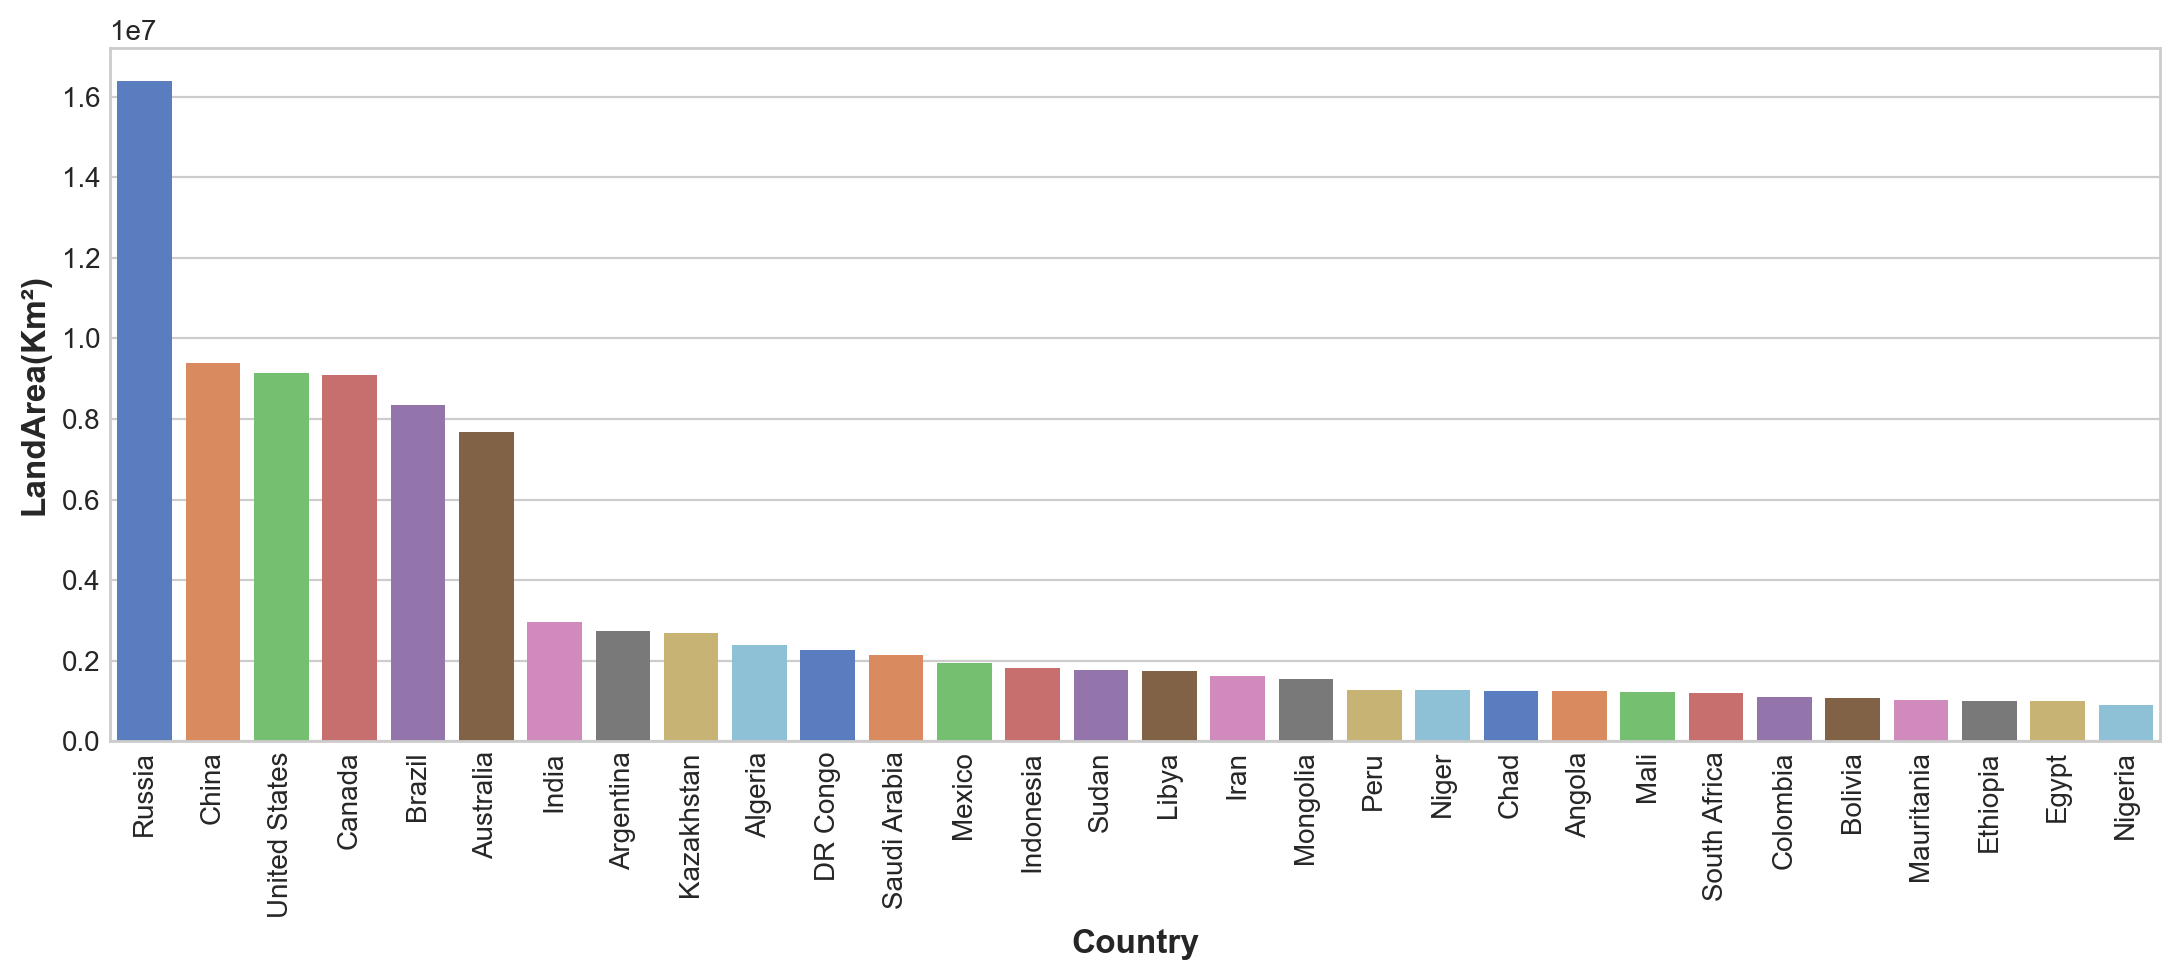

In [20]:
df_world_LandArea = df_world.sort_values(by=['LandArea(Km²)'], ascending = False).head(30)

p = sns.barplot(x="Country", data = df_world_LandArea, y= "LandArea(Km²)",  palette="muted")
_ = plt.setp(p.get_xticklabels(), rotation=90) 

In [21]:
df_corr = df_world.copy()

corrs= ['Country',"CCA3","Capital","Continent"]

for corr in corrs:
    df_corr[corr]= df_corr[corr].astype("category").cat.codes

<Axes: >

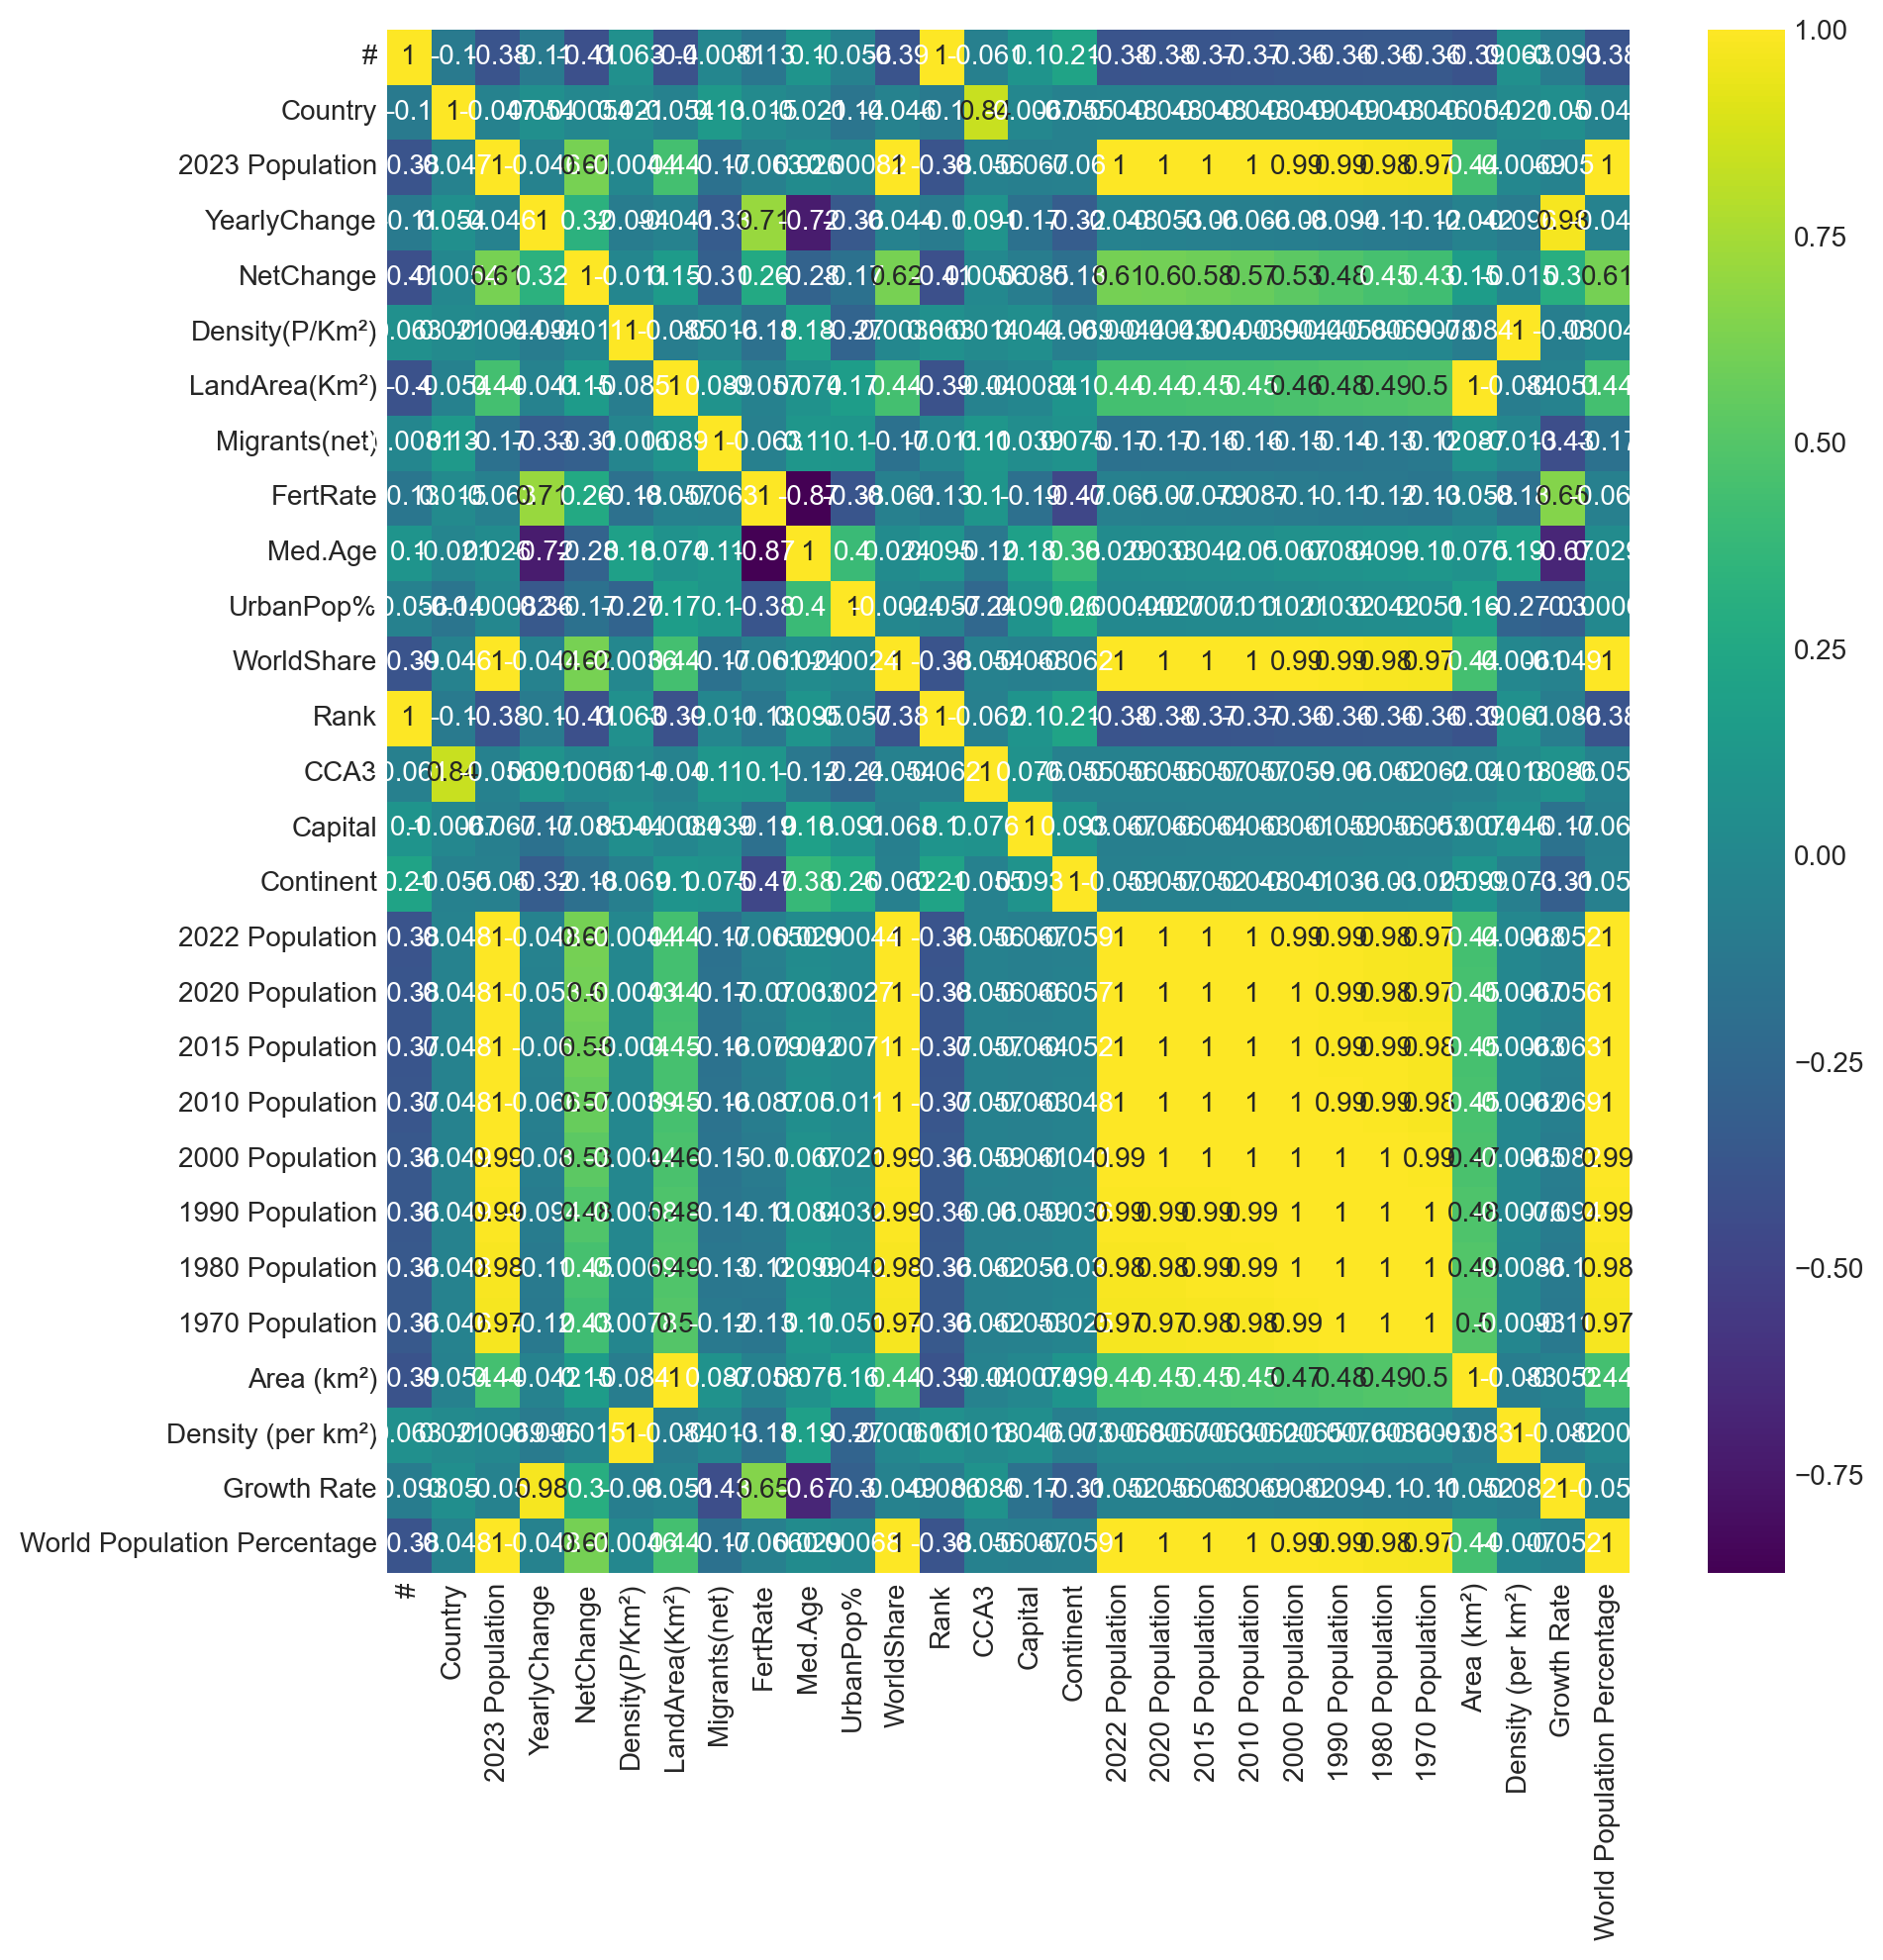

In [22]:
plt.figure(figsize=(10,10))
sns.heatmap(df_corr.corr(method = "pearson"),cmap='viridis',annot=True)

In [23]:
fig = px.choropleth(df_world, locations = "CCA3",color = "2023 Population", hover_name="Country",projection = "natural earth", title = "Population per country")

fig.show()

In [24]:
df_continent = df_world.groupby(by="Continent").sum()

df_continent["#"] = df_continent["#"].replace(4358,"Africa")
df_continent["#"] = df_continent["#"].replace(3592,"Asia")
df_continent["#"] = df_continent["#"].replace(4032,"Europe")
df_continent["#"] = df_continent["#"].replace(2450,"North America")
df_continent["#"] = df_continent["#"].replace(1514,"Oceania")
df_continent["#"] = df_continent["#"].replace(1139,"South America")
df_continent

#  \
Continent                      
Africa                Africa   
Asia                    Asia   
Europe                Europe   
North America  North America   
Oceania              Oceania   
South America  South America   

                                                         Country  \
Continent                                                          
Africa         NigeriaEthiopiaEgyptDR CongoTanzaniaSouth Afri...   
Asia           IndiaChinaIndonesiaPakistanBangladeshJapanPhil...   
Europe         RussiaGermanyUnited KingdomFranceItalySpainPol...   
North America  United StatesMexicoCanadaGuatemalaHaitiDominic...   
Oceania        AustraliaPapua New GuineaNew ZealandFijiSolomo...   
South America  BrazilColombiaArgentinaPeruVenezuelaChileEcuad...   

               2023 Population  YearlyChange  NetChange  Density(P/Km²)  \
Continent                                                                 
Africa              1423576561        112.18   32878293            6402   
Asia                4745744209         43.80   30306175           28260   
Europe               730837759          4.92   -1281666            6097   
North America        602932251         13.49    3856137            4182   
Oceania               45380312         13.36     536589            1108   
South America        439715218         11.99    2902390             309   

               LandArea(Km²)  Migrants(net)  FertRate  Med.Age  ...  \
Continent                                                       ...   
Africa              28980641        -537550   201.620   1024.0  ...   
Asia                31017841       -1492179   103.463   1474.0  ...   
Europe              22064042         778341    59.472   1622.0  ...   
North America       20914150        1106022    38.265    697.0  ...   
Oceania              8482390         144559    26.657    278.0  ...   
South America       17448942         -19098    27.524    383.0  ...   

               2015 Population  2010 Population  2000 Population  \
Continent                                                          
Africa            1.170666e+09     1.027984e+09     7.975449e+08   
Asia              4.453150e+09     4.215492e+09     3.731518e+09   
Europe            7.305047e+08     7.246559e+08     7.154054e+08   
North America     5.692177e+08     5.415958e+08     4.850351e+08   
Oceania           3.978715e+07     3.648726e+07     3.060427e+07   
South America     4.131310e+08     3.930751e+08     3.496312e+08   

              1990 Population 1980 Population  1970 Population  Area (km²)  \
Continent                                                                    
Africa           6.226397e+08    4.703719e+08     3.576771e+08  29645540.0   
Asia             3.208089e+09    2.633635e+09     2.143541e+09  32131891.0   
Europe           7.095988e+08    6.818835e+08     6.458027e+08  22928689.0   
North America    4.203066e+08    3.674077e+08     3.146251e+08  22072974.0   
Oceania          2.622099e+07    2.250808e+07     1.912627e+07   8510974.0   
South America    2.971441e+08    2.417868e+08     1.929449e+08  17821209.0   

               Density (per km²)  Growth Rate  World Population Percentage  
Continent                                                                   
Africa                 6015.0829      52.1206                        17.43  
Asia                  27234.8771      48.4340                        59.11  
Europe                 5926.6067      39.0869                         9.20  
North America          4111.2300      21.1194                         7.51  
Oceania                 477.2303      10.1332                         0.55  
South America           293.2972      13.1071                         5.48  

[6 rows x 27 columns]

In [25]:
fig = px.pie(df_continent, names= df_continent.index, values='Growth Rate',
             title='Total Growth Rate for each continent',
             hole=0.5,
             template='plotly_dark')

fig.show()

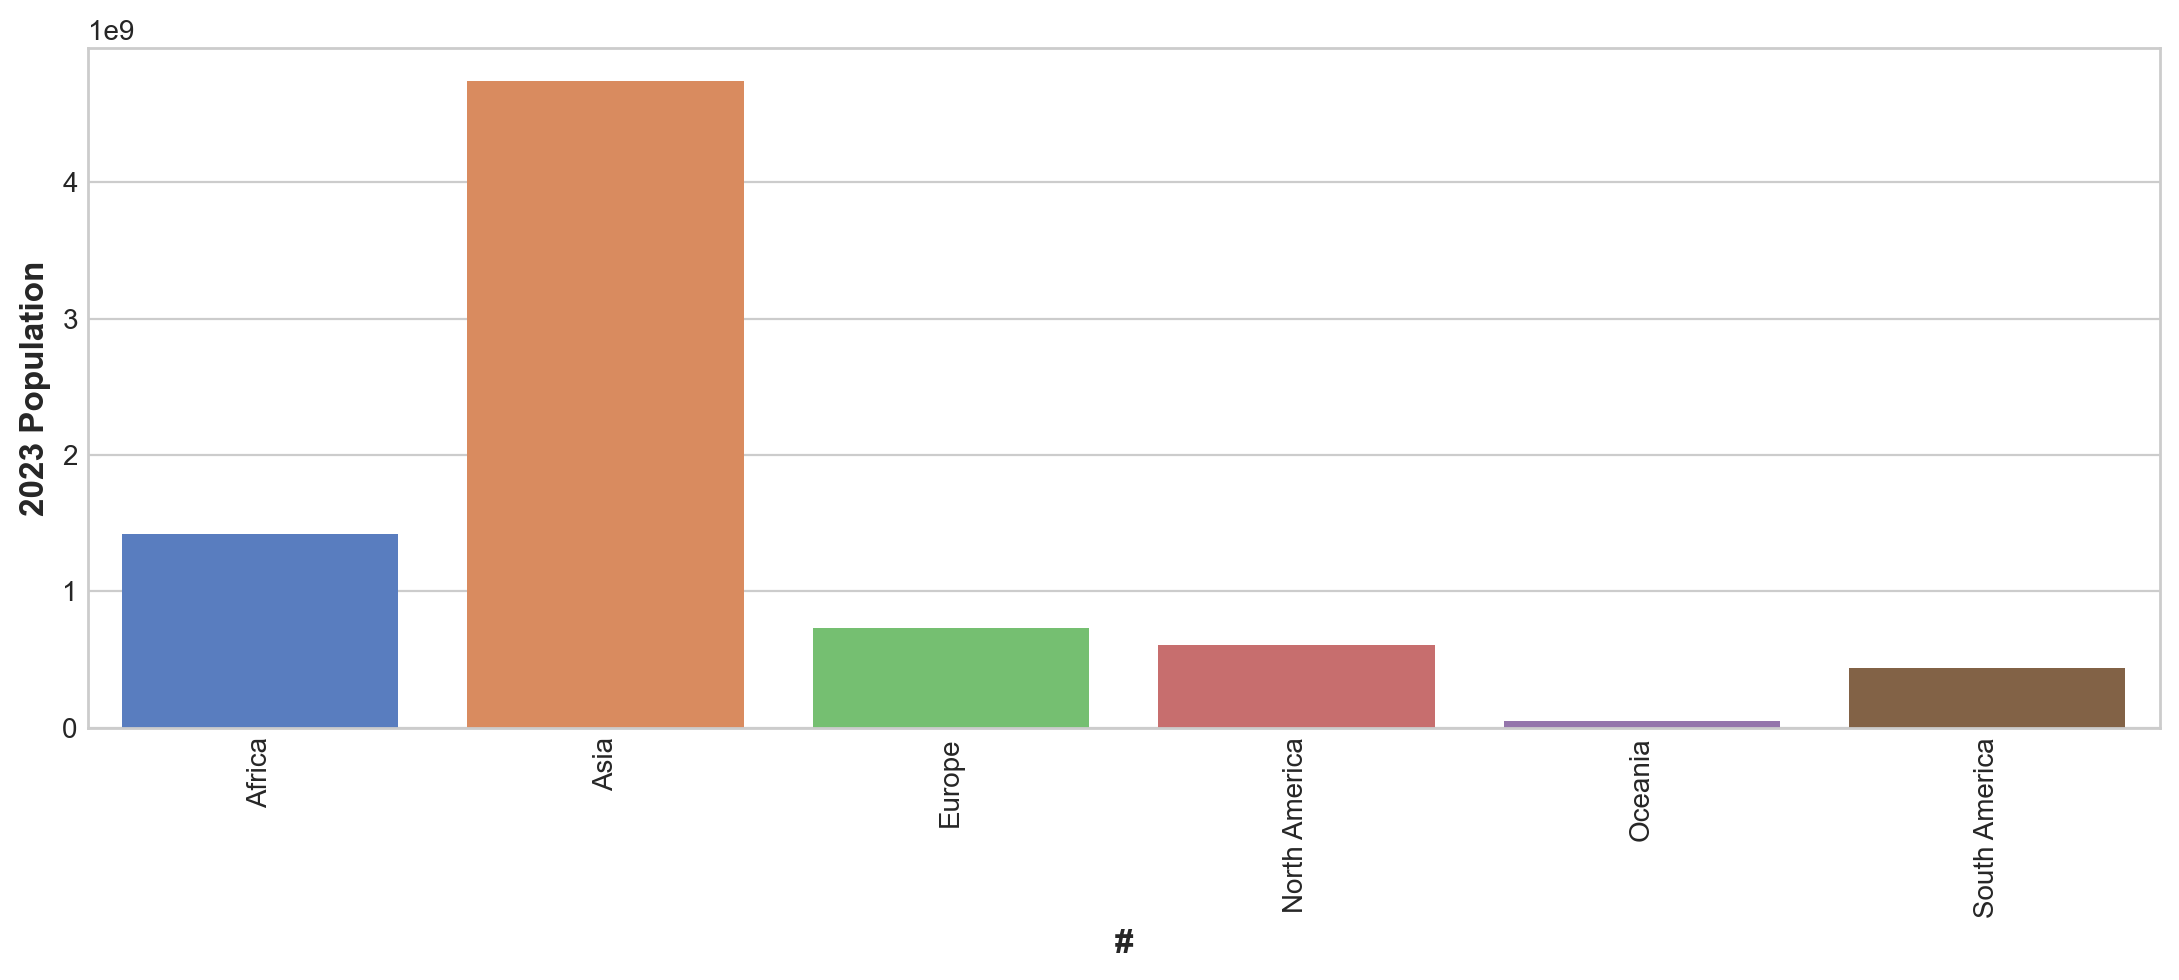

In [26]:
p = sns.barplot(x="#", data = df_continent, y= "2023 Population",  palette="muted")
_ = plt.setp(p.get_xticklabels(), rotation=90) 

In [27]:
fig = go.Figure()
fig.add_trace(go.Bar(x=df_continent["#"],
                y=df_continent["2023 Population"],
                name='2023 Population',
                marker_color='rgb(26, 150, 255)'
                ))
fig.add_trace(go.Bar(x=df_continent["#"],
                y=df_continent["2022 Population"],
                name='2022 Population',
                marker_color='rgb(26, 118, 255)'
                ))
fig.add_trace(go.Bar(x=df_continent["#"],
                y=df_continent["2020 Population"],
                name='2020 Population',
                marker_color='rgb(26, 110, 255)'
                ))

fig.add_trace(go.Bar(x=df_continent["#"],
                y=df_continent["2010 Population"],
                name='2010 Population',
                marker_color='rgb(26, 90, 255)'
                ))
fig.add_trace(go.Bar(x=df_continent["#"],
                y=df_continent["2000 Population"],
                name='2000 Population',
                marker_color='rgb(26, 60, 255)'
                ))
fig.add_trace(go.Bar(x=df_continent["#"],
                y=df_continent["1990 Population"],
                name='1990 Population',
                marker_color='rgb(26, 40, 255)'
                ))
fig.add_trace(go.Bar(x=df_continent["#"],
                y=df_continent["1980 Population"],
                name='1980 Population',
                marker_color='rgb(26, 20, 255)'
                ))

fig.add_trace(go.Bar(x=df_continent["#"],
                y=df_continent["1970 Population"],
                name='1970 Population',
                marker_color='rgb(26, 0, 255)'
                ))

fig.update_layout(
    title='Population through Years',
    xaxis_tickfont_size=14,
    yaxis=dict(
        title='Population',
        titlefont_size=16,
        tickfont_size=14,
    ),
    legend=dict(
        x=0,
        y=1.0,
        bgcolor='rgba(255, 255, 255, 0)',
        bordercolor='rgba(255, 255, 255, 0)'
    ),
    barmode='group',
    bargap=0.15, # gap between bars of adjacent location coordinates.
    bargroupgap=0.1 # gap between bars of the same location coordinate.
)
fig.show()

In [28]:
df_continent

#  \
Continent                      
Africa                Africa   
Asia                    Asia   
Europe                Europe   
North America  North America   
Oceania              Oceania   
South America  South America   

                                                         Country  \
Continent                                                          
Africa         NigeriaEthiopiaEgyptDR CongoTanzaniaSouth Afri...   
Asia           IndiaChinaIndonesiaPakistanBangladeshJapanPhil...   
Europe         RussiaGermanyUnited KingdomFranceItalySpainPol...   
North America  United StatesMexicoCanadaGuatemalaHaitiDominic...   
Oceania        AustraliaPapua New GuineaNew ZealandFijiSolomo...   
South America  BrazilColombiaArgentinaPeruVenezuelaChileEcuad...   

               2023 Population  YearlyChange  NetChange  Density(P/Km²)  \
Continent                                                                 
Africa              1423576561        112.18   32878293            6402   
Asia                4745744209         43.80   30306175           28260   
Europe               730837759          4.92   -1281666            6097   
North America        602932251         13.49    3856137            4182   
Oceania               45380312         13.36     536589            1108   
South America        439715218         11.99    2902390             309   

               LandArea(Km²)  Migrants(net)  FertRate  Med.Age  ...  \
Continent                                                       ...   
Africa              28980641        -537550   201.620   1024.0  ...   
Asia                31017841       -1492179   103.463   1474.0  ...   
Europe              22064042         778341    59.472   1622.0  ...   
North America       20914150        1106022    38.265    697.0  ...   
Oceania              8482390         144559    26.657    278.0  ...   
South America       17448942         -19098    27.524    383.0  ...   

               2015 Population  2010 Population  2000 Population  \
Continent                                                          
Africa            1.170666e+09     1.027984e+09     7.975449e+08   
Asia              4.453150e+09     4.215492e+09     3.731518e+09   
Europe            7.305047e+08     7.246559e+08     7.154054e+08   
North America     5.692177e+08     5.415958e+08     4.850351e+08   
Oceania           3.978715e+07     3.648726e+07     3.060427e+07   
South America     4.131310e+08     3.930751e+08     3.496312e+08   

              1990 Population 1980 Population  1970 Population  Area (km²)  \
Continent                                                                    
Africa           6.226397e+08    4.703719e+08     3.576771e+08  29645540.0   
Asia             3.208089e+09    2.633635e+09     2.143541e+09  32131891.0   
Europe           7.095988e+08    6.818835e+08     6.458027e+08  22928689.0   
North America    4.203066e+08    3.674077e+08     3.146251e+08  22072974.0   
Oceania          2.622099e+07    2.250808e+07     1.912627e+07   8510974.0   
South America    2.971441e+08    2.417868e+08     1.929449e+08  17821209.0   

               Density (per km²)  Growth Rate  World Population Percentage  
Continent                                                                   
Africa                 6015.0829      52.1206                        17.43  
Asia                  27234.8771      48.4340                        59.11  
Europe                 5926.6067      39.0869                         9.20  
North America          4111.2300      21.1194                         7.51  
Oceania                 477.2303      10.1332                         0.55  
South America           293.2972      13.1071                         5.48  

[6 rows x 27 columns]

In [29]:
df_population_world

Country Name Country Code                Indicator Name Indicator Code  \
0           Aruba          ABW  Population growth (annual %)    SP.POP.GROW   
1     Afghanistan          AFG  Population growth (annual %)    SP.POP.GROW   
2          Angola          AGO  Population growth (annual %)    SP.POP.GROW   
3         Albania          ALB  Population growth (annual %)    SP.POP.GROW   
4         Andorra          AND  Population growth (annual %)    SP.POP.GROW   
..            ...          ...                           ...            ...   
259        Kosovo          XKX  Population growth (annual %)    SP.POP.GROW   
260   Yemen, Rep.          YEM  Population growth (annual %)    SP.POP.GROW   
261  South Africa          ZAF  Population growth (annual %)    SP.POP.GROW   
262        Zambia          ZMB  Population growth (annual %)    SP.POP.GROW   
263      Zimbabwe          ZWE  Population growth (annual %)    SP.POP.GROW   

     1960      1961      1962      1963      1964      1965  ...      2011  \
0     0.0  2.238144  1.409622  0.832453  0.592649  0.573468  ...  0.370125   
1     0.0  1.898476  1.965751  2.029893  2.090248  2.147567  ...  3.143126   
2     0.0  1.393363  1.383629  1.256555  0.973962  0.617544  ...  3.634159   
3     0.0  3.120855  3.056731  2.953749  2.880686  2.754021  ... -0.269017   
4     0.0  6.941532  6.692697  6.559522  6.241511  5.998800  ... -0.834745   
..    ...       ...       ...       ...       ...       ...  ...       ...   
259   0.0  1.986474  2.857337  2.777956  2.702867  2.631731  ...  0.859067   
260   0.0  1.450869  1.484101  1.506678  1.515090  1.515578  ...  2.779988   
261   0.0  2.453268  2.486399  2.514285  2.535788  2.552486  ...  1.525314   
262   0.0  3.001073  2.998554  3.004536  3.022485  3.049879  ...  3.020291   
263   0.0  3.342091  3.378041  3.395952  3.391104  3.373423  ...  1.536391   

         2012      2013      2014      2015      2016      2017      2018  \
0    0.502430  0.582349  0.594397  0.544892  0.507618  0.469944  0.453576   
1    3.407587  3.494589  3.355582  3.077084  2.778317  2.548347  2.384761   
2    3.597774  3.551950  3.497493  3.438851  3.378273  3.322081  3.276134   
3   -0.165151 -0.183211 -0.207047 -0.291206 -0.159880 -0.091972 -0.246732   
4   -1.588730 -2.025792 -1.951470 -1.529058 -0.919470 -0.383674  0.006493   
..        ...       ...       ...       ...       ...       ...       ...   
259  0.895255  0.607468 -0.294474 -1.364932 -0.596734  0.753585  0.339011   
260  2.757339  2.716520  2.654141  2.578072  2.498247  2.424025  2.357023   
261  1.583107  1.605752  1.583168  1.528926  1.464829  1.407741  1.357697   
262  3.102770  3.139812  3.121305  3.066875  3.003346  2.951583  2.912801   
263  1.698001  1.777645  1.754692  1.663813  1.549759  1.460061  1.410783   

         2019  2020  
0    0.442122   0.0  
1    2.311817   0.0  
2    3.242983   0.0  
3   -0.426007   0.0  
4    0.176454   0.0  
..        ...   ...  
259 -0.157992   0.0  
260  2.300580   0.0  
261  1.338617   0.0  
262  2.892373   0.0  
263  1.419681   0.0  

[260 rows x 65 columns]

In [30]:
World = df_population_world[df_population_world["Country Name"] == "World"].copy()
World = World.iloc[:,5:60]
World = World.transpose()

World.index = pd.to_datetime(World.index)
World

257
1961-01-01  1.353920
1962-01-01  1.724198
1963-01-01  2.083131
1964-01-01  2.052951
1965-01-01  2.054892
1966-01-01  2.108305
1967-01-01  2.046206
1968-01-01  2.032273
1969-01-01  2.113693
1970-01-01  2.090396
1971-01-01  2.106974
1972-01-01  2.031203
1973-01-01  1.966566
1974-01-01  1.945908
1975-01-01  1.865028
1976-01-01  1.785770
1977-01-01  1.749490
1978-01-01  1.747865
1979-01-01  1.761919
1980-01-01  1.748543
1981-01-01  1.764333
1982-01-01  1.800079
1983-01-01  1.783946
1984-01-01  1.746758
1985-01-01  1.748568
1986-01-01  1.770219
1987-01-01  1.783210
1988-01-01  1.770396
1989-01-01  1.738764
1990-01-01  1.735637
1991-01-01  1.666437
1992-01-01  1.570110
1993-01-01  1.561925
1994-01-01  1.521905
1995-01-01  1.510230
1996-01-01  1.453290
1997-01-01  1.427218
1998-01-01  1.392160
1999-01-01  1.351800
2000-01-01  1.323073
2001-01-01  1.297594
2002-01-01  1.276806
2003-01-01  1.261478
2004-01-01  1.254263
2005-01-01  1.246927
2006-01-01  1.243693
2007-01-01  1.235741
2008-01-01  1.239313
2009-01-01  1.223285
2010-01-01  1.203252
2011-01-01  1.170040
2012-01-01  1.183831
2013-01-01  1.183727
2014-01-01  1.179816
2015-01-01  1.168120

With TimeStep


In [31]:
World['time'] = np.arange(len(World.index))
World = World.rename(columns = {257:"Population"})
World.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 55 entries, 1961-01-01 to 2015-01-01
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Population  55 non-null     float64
 1   time        55 non-null     int32  
dtypes: float64(1), int32(1)
memory usage: 1.1 KB


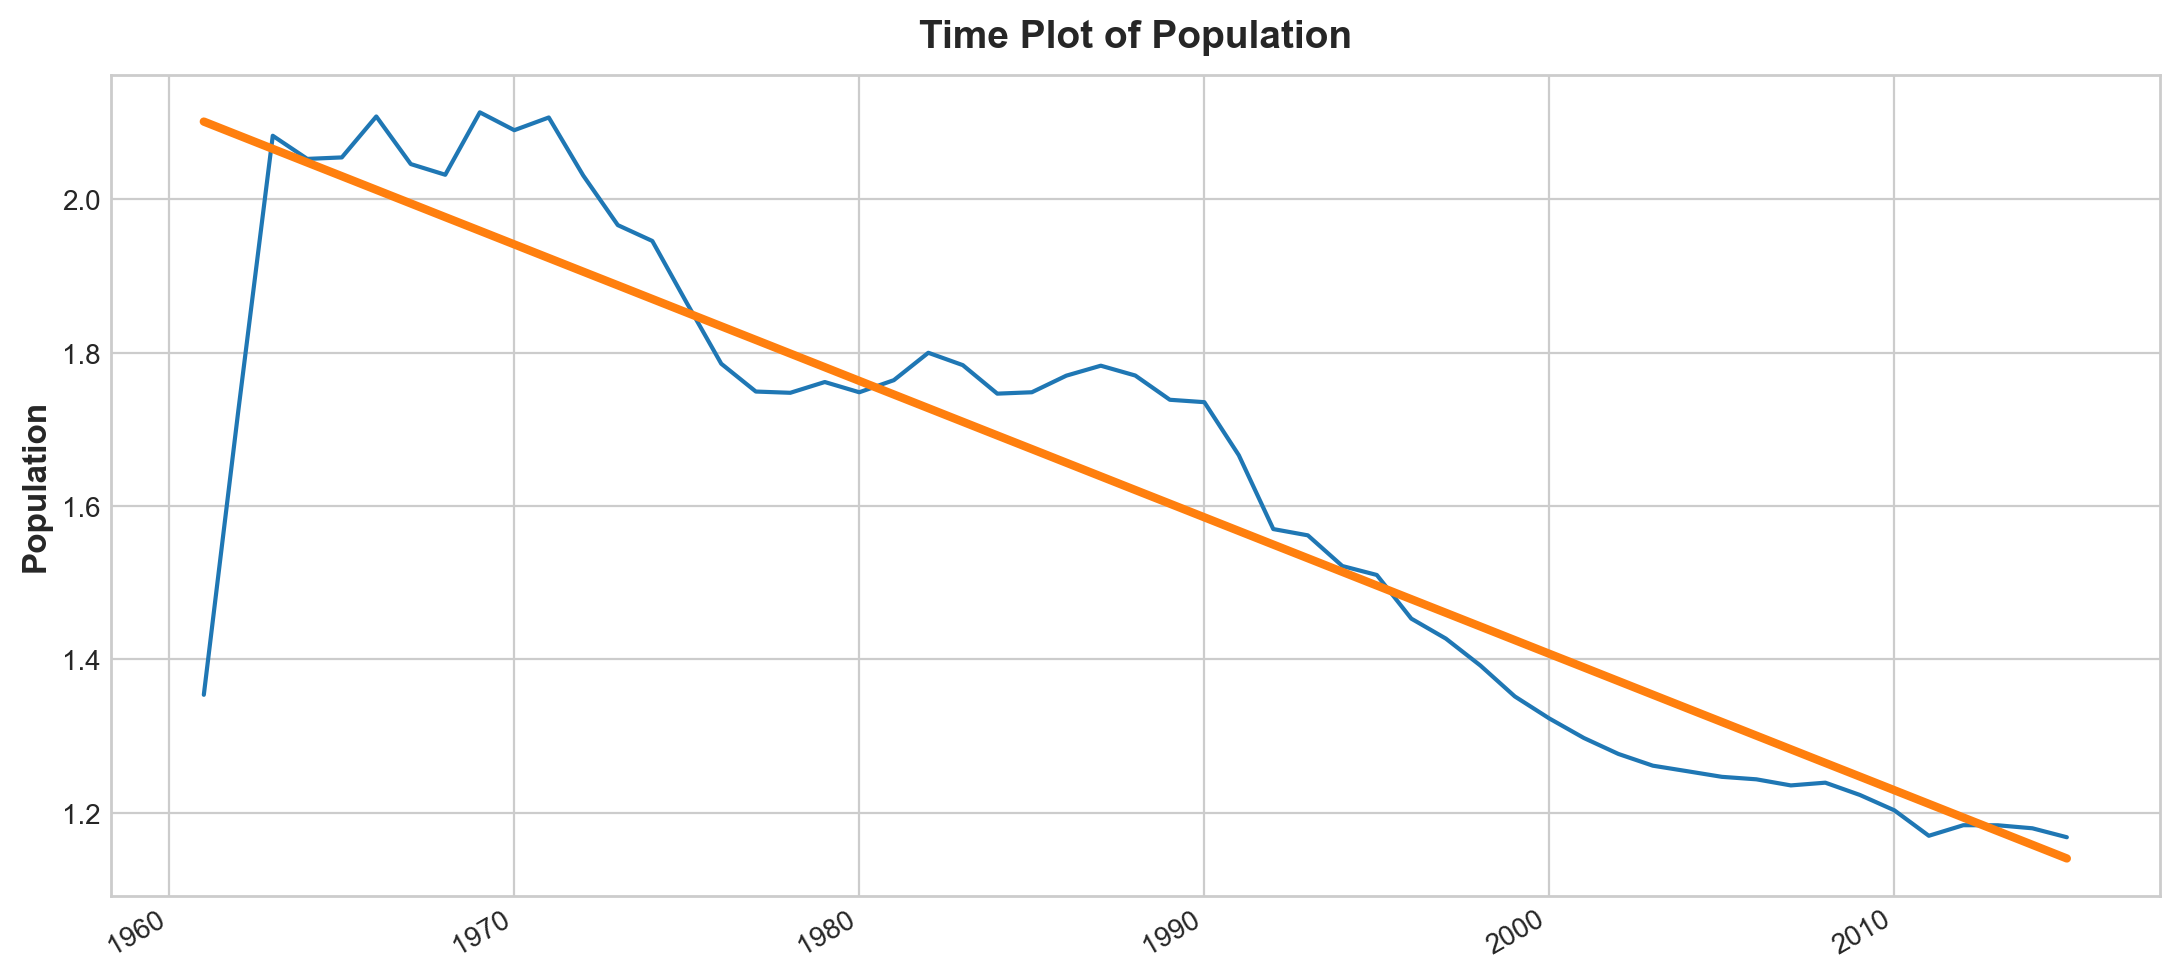

In [32]:
#Training Data
X = World.loc[:,['time']]
y = World.loc[:,"Population"]

model = LinearRegression()
model.fit(X,y)

y_pred = pd.Series(model.predict(X), index=X.index)
fig, ax = plt.subplots()
ax = sns.lineplot(data = World, x =World.index, y = 'Population')
ax = y_pred.plot(ax=ax, linewidth=3)
ax.set_title('Time Plot of Population');
plt.show()